In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<Figure size 4000x3000 with 0 Axes>

<Figure size 4000x3000 with 0 Axes>

In [8]:
filename = './data/sp500.csv'
data = pd.read_csv(filename)

data.head()

,Date,Open,High,Low,Close,Volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [9]:
data_train, data_test = train_test_split(data, test_size=0.15, shuffle=False)

In [10]:
print(data.shape)
print(data_train.shape)
print(data_test.shape)

(4697, 6)
(3992, 6)
(705, 6)


In [11]:
def generate_data(data, feature_cols, test_ratio=0.4, window_size=50, norm=True):
    data = data[feature_cols]
    data_train, data_test = train_test_split(data, test_size=test_ratio, shuffle=False)
    
    train_len = data_train.shape[0]
    test_len = data_test.shape[0]
    
    print(data_train.shape)
    print(data_test.shape)
    
    normalized_data = []
    y = []
    
    for i in range(train_len - window_size):
        window = np.array(data_train[i:i + window_size])
        
        if i == 0 or i == 1:
            print("Window before normalization:- ")
            print(window)
        
        normalized_window = [[], []]
        
        for j in range(2):
            normalized_col = [((float(p) / float(window[0, j])) - 1) for p in window[:, j]]
            normalized_window[j] = normalized_col
        
        normalized_window = np.array(normalized_window).T
        
        if i == 0 or i == 1:
            print("Window after normalization:- ")
            print(normalized_window)
        
        y.append(normalized_window[-1, [0]])
        
        normalized_window = normalized_window[:-1]
        
        normalized_data.append(normalized_window)
    
    x = np.array(normalized_data)
        
    normalized_data = []
    y_test = []
        
    for i in range(test_len - window_size):
        window = np.array(data_test[i:i + window_size])
        
        normalized_window = []
        
        for j in range(2):
            #print(window[col][i])
            
            normalized_col = [((float(p) / float(window[0, j])) - 1) for p in window[:, j]]
            normalized_window.append(normalized_col)
        
        normalized_window = np.array(normalized_window).T
        
        y_test.append(normalized_window[-1, [0]])
        
        normalized_window = normalized_window[:-1]
        
        normalized_data.append(normalized_window)
    x_test = np.array(normalized_data)
        
    return x, np.array(y), x_test, np.array(y_test)
    

In [12]:
x, y, x_test, y_test = generate_data(data, feature_cols=['Close', 'Volume'], test_ratio=0.15)

(3992, 2)
(705, 2)
Window before normalization:- 
[[1.45521997e+03 9.31800000e+08]
 [1.39942004e+03 1.00900000e+09]
 [1.40210999e+03 1.08550000e+09]
 [1.40344995e+03 1.09230000e+09]
 [1.44146997e+03 1.22520000e+09]
 [1.45759998e+03 1.06480000e+09]
 [1.43856006e+03 1.01400000e+09]
 [1.43225000e+03 9.74600000e+08]
 [1.44968005e+03 1.03040000e+09]
 [1.46515002e+03 1.08590000e+09]
 [1.45514001e+03 1.05670000e+09]
 [1.45590002e+03 1.08780000e+09]
 [1.44556995e+03 1.10070000e+09]
 [1.44135999e+03 1.20980000e+09]
 [1.40153003e+03 1.11580000e+09]
 [1.41003003e+03 1.07370000e+09]
 [1.40408997e+03 1.11730000e+09]
 [1.39856006e+03 1.12950000e+09]
 [1.36016003e+03 1.09580000e+09]
 [1.39445996e+03 9.93800000e+08]
 [1.40928003e+03 9.81000000e+08]
 [1.40912000e+03 1.03860000e+09]
 [1.42496997e+03 1.14650000e+09]
 [1.42437000e+03 1.04510000e+09]
 [1.42423999e+03 9.18100000e+08]
 [1.44171997e+03 1.04770000e+09]
 [1.41170996e+03 1.05050000e+09]
 [1.41682996e+03 1.05880000e+09]
 [1.38712000e+03 1.0257000

In [13]:
print(x)
print(y)
print(x_test)
print(y_test)

[[[ 0.          0.        ]
  [-0.03834467  0.0828504 ]
  [-0.03649619  0.16494956]
  ...
  [-0.03678484  0.20519425]
  [-0.04133397  0.22215068]
  [-0.04920217  0.09047006]]

 [[ 0.          0.        ]
  [ 0.00192218  0.07581764]
  [ 0.0028797   0.08255699]
  ...
  [-0.0031085   0.12864222]
  [-0.01129043  0.00703667]
  [-0.02877622  0.08424182]]

 [[ 0.          0.        ]
  [ 0.00095568  0.00626439]
  [ 0.02807197  0.12869645]
  ...
  [-0.01318726 -0.06393367]
  [-0.03063951  0.00783049]
  [-0.00711069  0.20018425]]

 ...

 [[ 0.          0.        ]
  [-0.02957645  0.11666369]
  [-0.01182451 -0.04405507]
  ...
  [ 0.06598282  0.04183035]
  [ 0.06477597  0.03493908]
  [ 0.06440583  0.11594084]]

 [[ 0.          0.        ]
  [ 0.01829297 -0.14392763]
  [ 0.01947908 -0.19468875]
  ...
  [ 0.09722808 -0.07318641]
  [ 0.09684666 -0.00064732]
  [ 0.08607263 -0.11196633]]

 [[ 0.          0.        ]
  [ 0.00116479 -0.05929536]
  [-0.01418266 -0.1537773 ]
  ...
  [ 0.07714252  0.167369

In [14]:
print(x.shape[0])

3942


In [25]:
np.random.seed(101)

model = Sequential()

model.add(LSTM(100, input_shape=(x.shape[1], x.shape[2]), return_sequences=True))
model.add(Dropout(0.175))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.175))
model.add(Dense(1, activation='linear'))

Tensor("lstm_7/clip_by_value:0", shape=(?, 100), dtype=float32)
Tensor("lstm_7/clip_by_value_1:0", shape=(?, 100), dtype=float32)
Tensor("lstm_7/add_5:0", shape=(?, 100), dtype=float32)
Tensor("lstm_7/clip_by_value_2:0", shape=(?, 100), dtype=float32)
Tensor("lstm_7/while/clip_by_value:0", shape=(?, 100), dtype=float32)
Tensor("lstm_7/while/clip_by_value_1:0", shape=(?, 100), dtype=float32)
Tensor("lstm_7/while/add_5:0", shape=(?, 100), dtype=float32)
Tensor("lstm_7/while/clip_by_value_2:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/clip_by_value:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/clip_by_value_1:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/add_5:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/clip_by_value_2:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/while/clip_by_value:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/while/clip_by_value_1:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/while/add_5:0", shape=(?, 100), dtype=float32)
Tensor("lstm_8/w

In [26]:
#callbacks = [EarlyStopping(monitor='val_loss', patience=2), ModelCheckpoint(filepath=save_fname, monitor='val_loss', save_best_only=True)]
#callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

model.compile(loss='mse', optimizer='adam')

model.fit(x, y, epochs=2, batch_size=32)

Epoch 1/2
3942/3942 [==============================] - 15s 4ms/step - loss: 9.3201e-04
Epoch 2/2
3942/3942 [==============================] - 18s 5ms/step - loss: 5.4372e-04


Time taken:-  0.013490438461303711
Time taken:-  0.019028425216674805
Time taken:-  0.009083986282348633
Time taken:-  0.009446382522583008
Time taken:-  0.009106159210205078
Time taken:-  0.00873255729675293
Time taken:-  0.008818626403808594
Time taken:-  0.009024620056152344
Time taken:-  0.00894021987915039
Time taken:-  0.009881019592285156
Time taken:-  0.008787870407104492
Time taken:-  0.009797096252441406
Time taken:-  0.01114964485168457
Time taken:-  0.012793540954589844
Time taken:-  0.008649826049804688
Time taken:-  0.00900125503540039
Time taken:-  0.008806705474853516
Time taken:-  0.00889277458190918
Time taken:-  0.008734703063964844
Time taken:-  0.008901834487915039
Time taken:-  0.008993387222290039
Time taken:-  0.009311437606811523
Time taken:-  0.00882577896118164
Time taken:-  0.019748926162719727
Time taken:-  0.013065338134765625
Time taken:-  0.008994102478027344
Time taken:-  0.008977890014648438
Time taken:-  0.008724451065063477
Time taken:-  0.0087671279

Time taken:-  0.011719703674316406
Time taken:-  0.011203527450561523
Time taken:-  0.009305715560913086
Time taken:-  0.009440422058105469
Time taken:-  0.009214162826538086
Time taken:-  0.009689092636108398
Time taken:-  0.01377105712890625
Time taken:-  0.00938725471496582
Time taken:-  0.01017618179321289
Time taken:-  0.011208534240722656
Time taken:-  0.009432077407836914
Time taken:-  0.009647369384765625
Time taken:-  0.010270833969116211
Time taken:-  0.009772539138793945
Time taken:-  0.009050846099853516
Time taken:-  0.00924372673034668
Time taken:-  0.009849071502685547
Time taken:-  0.010544776916503906
Time taken:-  0.012651681900024414
Time taken:-  0.010966062545776367
Time taken:-  0.009250164031982422
Epoch 1/1
1/1 [==============================] - 0s 57ms/step - loss: 0.0011
Time taken:-  0.010591506958007812
Time taken:-  0.010676383972167969
Time taken:-  0.010178804397583008
Time taken:-  0.01143193244934082
Time taken:-  0.012768983840942383
Time taken:-  0.01

Time taken:-  0.010131120681762695
Time taken:-  0.010894298553466797
Time taken:-  0.010927677154541016
Time taken:-  0.009333372116088867
Time taken:-  0.009201288223266602
Time taken:-  0.009605884552001953
Time taken:-  0.00965118408203125
Time taken:-  0.014322757720947266
Time taken:-  0.013168096542358398
Time taken:-  0.009625673294067383
Time taken:-  0.009664773941040039
Time taken:-  0.012682676315307617
Time taken:-  0.012472391128540039
Time taken:-  0.00944662094116211
Time taken:-  0.01670527458190918
Time taken:-  0.013355255126953125
Time taken:-  0.009022712707519531
Time taken:-  0.008688211441040039
Time taken:-  0.008868932723999023
Time taken:-  0.008807182312011719
Time taken:-  0.00881052017211914
Time taken:-  0.009155035018920898
Time taken:-  0.008867502212524414
Time taken:-  0.010457992553710938
Time taken:-  0.009090185165405273
Time taken:-  0.00895237922668457
Time taken:-  0.01000356674194336
Time taken:-  0.008949756622314453
Time taken:-  0.0086333751

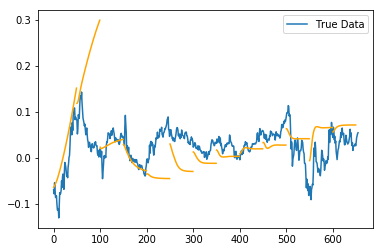

In [31]:
# Predicting over a window size of 50

prediction_len = 50

prediction_seqs = []

for i in range(int( len(x_test) / prediction_len ) ):
    curr_frame = x_test[i * prediction_len]
    predicted = []
    
    save_x = curr_frame[np.newaxis, :, :]
    save_y = y_test[i * prediction_len]
    
    for j in range(prediction_len):
        
        # Convert to 3 dimensions
        
        a = time.time()
        prediction = model.predict(curr_frame[np.newaxis, :, :])
        predicted.append(prediction)
        b = time.time()
        
        prediction = model.predict(curr_frame[np.newaxis, :, :])
        
        print("Time taken:- ", (b - a) )
        
        # Removing the first element of the frame
        curr_frame = curr_frame[1:]
        
        # Appending the predicted element
        curr_frame = np.insert(curr_frame, [prediction_len-2], predicted[-1], axis=0)
    
    prediction_seqs.append(predicted)
    
    # Online learning approach
    model.fit(save_x, save_y, epochs=1, batch_size=1)
    
prediction_seqs = np.array(prediction_seqs)
print(prediction_seqs.shape)

prediction_seqs = np.reshape(prediction_seqs, (prediction_seqs.shape[0], prediction_seqs.shape[1]))
print(prediction_seqs.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test, label='True Data')
plt.legend()
# Pad the list of predictions to shift it in the graph to it's correct start
for i, data in enumerate(prediction_seqs):
    padding = np.array([None for p in range(i * prediction_len)])
    
    print("Padding ", padding.shape)
    #y_plot = np.concatenate((padding, data), axis=1)
    print(data.shape)
    y_plot = np.concatenate((padding, data), axis=0)
    plt.plot(y_plot, color='orange')
plt.savefig('prediction.pdf')
plt.show()


In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 49, 100)           41200     
_________________________________________________________________
dropout_27 (Dropout)         (None, 49, 100)           0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 49, 100)           80400     
_________________________________________________________________
lstm_42 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 202,101
Trainable params: 202,101
Non-trainable params: 0
_________________________________________________________________


In [87]:
y_test.shape

(655, 1)


RMS:  0.0913168729895498
RMS:  0.024269591798019456
RMS:  0.044532752026855596
RMS:  0.04427291487719877
RMS:  0.03750297253713938
RMS:  0.029737959306916487
RMS:  0.013877300950514876
RMS:  0.017693657700540957
RMS:  0.03276659244651452
RMS:  0.05891010108283008
RMS:  0.07426438891174207

Average time per loop: 0.00016184286637739703


<Figure size 4000x3000 with 0 Axes>

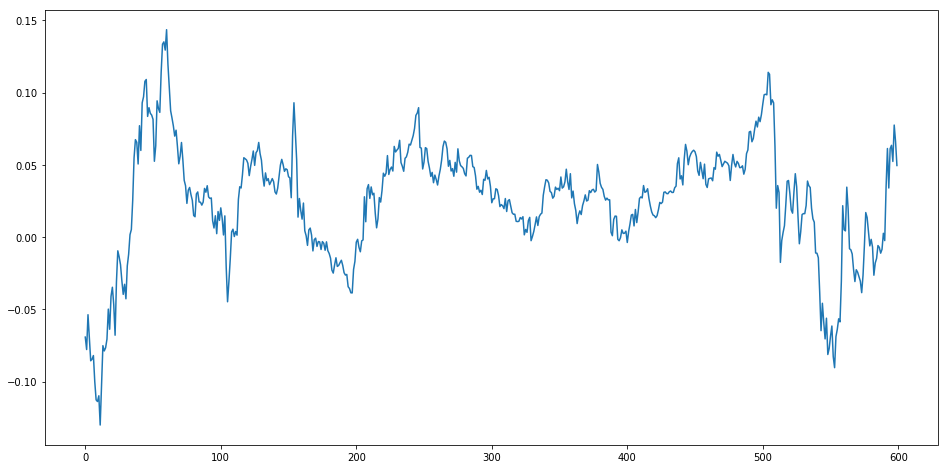

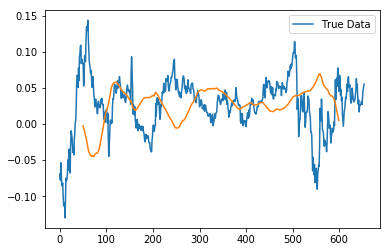

In [28]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Data_Normalization import generate_data

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')

read_data = pd.read_csv('sp500.csv')
#read_data = read_data[['Close']]

x, y, x_test, y_test = generate_data(read_data, feature_cols=['Close', 'Volume'], test_ratio=0.15)
print()
data = [y_test[i][0] for i in range(y_test.shape[0])]
#print(data)

N = 50
alpha = 2 / (N + 1)	# For 50 days EWMA
ewm = 0

# plot
plt.figure(figsize=(16,8))
plt.plot(data[0:600])

predicted_out = []

start_time = time.time()

for j in range(0,550,50):
	
	#splitting into train and validation
	train = data[j:j+50]
	valid = data[j+50:j+100]
	#ewm = 0
	
	#make predictions
	preds = []
	for i in range(0,len(valid)):
		ewm = (1 - alpha) * ewm + alpha * train[i]
		#ewm = ewm / (1 - alpha ** i)
		preds.append(ewm)
		
	#calculate rmse
	rms = np.sqrt(np.mean(np.power((np.array(valid) - preds), 2)))
	print("RMS: ", rms)

	#valid['Predictions'] = 0
	#valid['Predictions'] = preds
	#plt.plot(train['Close'])
	#plt.plot(valid[['Close', 'Predictions']])
	#plt.plot(valid['Predictions'])
	predicted_out += preds
	
end_time = time.time()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test, label='True Data')
plt.legend()

index = [i for i in range(50, 600)]
plt.plot(index, predicted_out)

plt.savefig('expo.pdf')

print("\nAverage time per loop: {}".format((end_time - start_time)/11))

plt.show()


RMS:  0.06511280736381748
RMS:  0.03118727618495435
RMS:  0.051309058773055465
RMS:  0.06123019707803019
RMS:  0.011964271815689953
RMS:  0.027594623657086606
RMS:  0.014729518419148891
RMS:  0.02041251776809583
RMS:  0.020993384095022948
RMS:  0.0636980739521614
RMS:  0.0456383882722419

Average time per loop: 0.00016717477278275922


<Figure size 4000x3000 with 0 Axes>

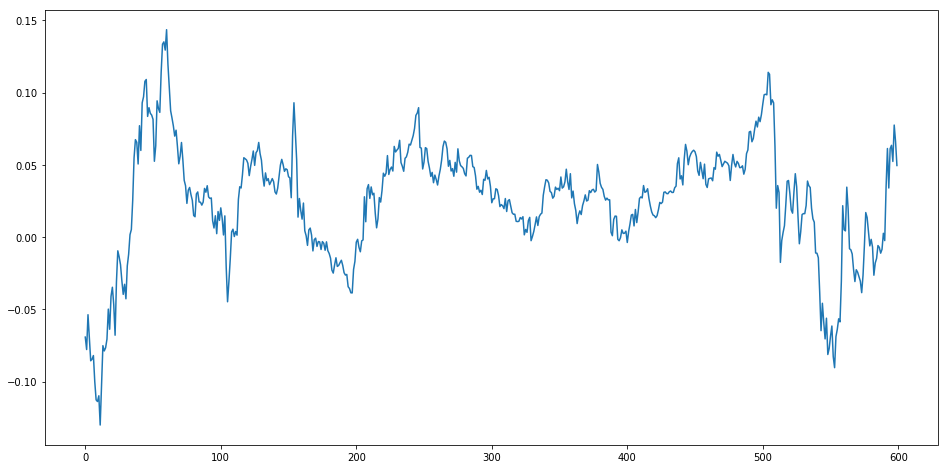

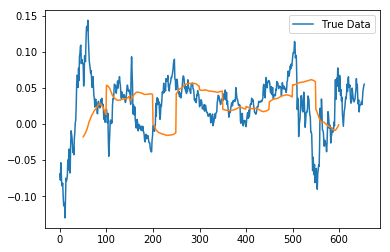

In [29]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Data_Normalization import generate_data

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')

read_data = pd.read_csv('sp500.csv')
#read_data = read_data[['Close']]

x, y, x_test, y_test = generate_data(read_data, feature_cols=['Close', 'Volume'], test_ratio=0.15)
print()
data = [y_test[i][0] for i in range(y_test.shape[0])]
#print(data)

# plot
plt.figure(figsize=(16,8))
plt.plot(data[0:600])

predicted_out = []

start_time = time.time()

for j in range(0,550,50):
	
	#splitting into train and validation
	train = data[j:j+50]
	valid = data[j+50:j+100]

	#make predictions
	preds = []
	total = sum(train[len(train)-len(valid) : ])
	
	for i in range(0,len(valid)):
		temp = total / len(valid)
		total += temp - train[len(train)-len(valid)+i]
		#a = sum(train[len(train)-len(valid)+i : ]) + sum(preds)
		#b = a / len(valid)
		preds.append(temp)
		
	#calculate rmse
	rms = np.sqrt(np.mean(np.power((np.array(valid) - preds),2)))
	print("RMS: ", rms)

	#valid['Predictions'] = 0
	#valid['Predictions'] = preds
	#plt.plot(train['Close'])
	#plt.plot(valid[['Close', 'Predictions']])
	#plt.plot(valid['Predictions'])
	predicted_out += preds
	
end_time = time.time()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test, label='True Data')
plt.legend()

index = [i for i in range(50,600)]
plt.plot(index, predicted_out)

plt.savefig('moving.pdf')

print("\nAverage time per loop: {}".format((end_time - start_time)/11))

plt.show()